In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from scipy import stats
import scipy
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15,8)

In [3]:
df=pd.read_csv('trainAN.csv')

In [4]:
df

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Target
0,01-01-2016,1,28,Male,C23,Master,57387,12/24/2015,NaN,1,1,2381060,2,True
1,02-01-2016,1,28,Male,C23,Master,57387,12/24/2015,NaN,1,1,-665480,2,True
2,03-01-2016,1,28,Male,C23,Master,57387,12/24/2015,03-11-2016,1,1,0,2,False
3,11-01-2017,2,31,Male,C7,Master,67016,11-06-2017,NaN,2,2,0,1,True
4,12-01-2017,2,31,Male,C7,Master,67016,11-06-2017,NaN,2,2,0,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,08-01-2017,2788,30,Male,C27,Master,70254,06-08-2017,NaN,2,2,740280,3,True
19100,09-01-2017,2788,30,Male,C27,Master,70254,06-08-2017,NaN,2,2,448370,3,True
19101,10-01-2017,2788,30,Male,C27,Master,70254,06-08-2017,NaN,2,2,0,2,True
19102,11-01-2017,2788,30,Male,C27,Master,70254,06-08-2017,NaN,2,2,200420,2,True


# I Created Target varialble based on (LAST WORKING DATA VARIABLE ) where the preson resigned stated as 'False', not Resigned as 'True'

In [5]:
df["Target"]=df["Target"].replace(to_replace=[True,False],value=[0,1]) # converterd 'TRUE' as 0,FALSE as 1

In [6]:
df.drop('MMM-YY',axis=1,inplace = True) # droping unwanted variables

In [7]:
df.drop('LastWorkingDate',axis=1,inplace = True) # AS i converted this varible in Target in excel , i decided to drop this column

In [8]:
df

,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,Joining Designation,Designation,Total Business Value,Quarterly Rating,Target
0,1,28,Male,C23,Master,57387,12/24/2015,1,1,2381060,2,0
1,1,28,Male,C23,Master,57387,12/24/2015,1,1,-665480,2,0
2,1,28,Male,C23,Master,57387,12/24/2015,1,1,0,2,1
3,2,31,Male,C7,Master,67016,11-06-2017,2,2,0,1,0
4,2,31,Male,C7,Master,67016,11-06-2017,2,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2788,30,Male,C27,Master,70254,06-08-2017,2,2,740280,3,0
19100,2788,30,Male,C27,Master,70254,06-08-2017,2,2,448370,3,0
19101,2788,30,Male,C27,Master,70254,06-08-2017,2,2,0,2,0
19102,2788,30,Male,C27,Master,70254,06-08-2017,2,2,200420,2,0


In [9]:
df.describe()

,Emp_ID,Age,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,Target
count,19104.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000,19104.000000
mean,1415.591133,34.650283,65652.025126,1.690536,2.252670,5.716621e+05,2.008899,0.084590
std,810.705321,6.264471,30914.515344,0.836984,1.026512,1.128312e+06,1.009832,0.278277
min,1.000000,21.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000,0.000000
25%,710.000000,30.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000,0.000000
50%,1417.000000,34.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000,0.000000
75%,2137.000000,39.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000,0.000000
max,2788.000000,58.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Emp_ID                19104 non-null  int64 
 1   Age                   19104 non-null  int64 
 2   Gender                19104 non-null  object
 3   City                  19104 non-null  object
 4   Education_Level       19104 non-null  object
 5   Salary                19104 non-null  int64 
 6   Dateofjoining         19104 non-null  object
 7   Joining Designation   19104 non-null  int64 
 8   Designation           19104 non-null  int64 
 9   Total Business Value  19104 non-null  int64 
 10  Quarterly Rating      19104 non-null  int64 
 11  Target                19104 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.7+ MB


In [11]:
df.isna().sum()

Emp_ID                  0
Age                     0
Gender                  0
City                    0
Education_Level         0
Salary                  0
Dateofjoining           0
Joining Designation     0
Designation             0
Total Business Value    0
Quarterly Rating        0
Target                  0
dtype: int64

# Exploratary Data Ananlysis

In [12]:
df.Age.value_counts()

36    1283
33    1250
34    1234
32    1150
30    1146
35    1138
31    1090
29    1013
37     862
38     854
39     788
28     772
27     752
40     706
41     661
26     583
42     478
25     449
44     407
43     399
45     371
46     350
24     277
47     224
23     193
48     144
49      99
22      92
52      78
51      72
50      69
21      41
53      26
54      25
55      21
58       7
Name: Age, dtype: int64

(array([ 603., 2556., 4399., 3622., 3787., 2244., 1128.,  536.,  201.,
          28.]),
 array([21. , 24.7, 28.4, 32.1, 35.8, 39.5, 43.2, 46.9, 50.6, 54.3, 58. ]),
 <BarContainer object of 10 artists>)

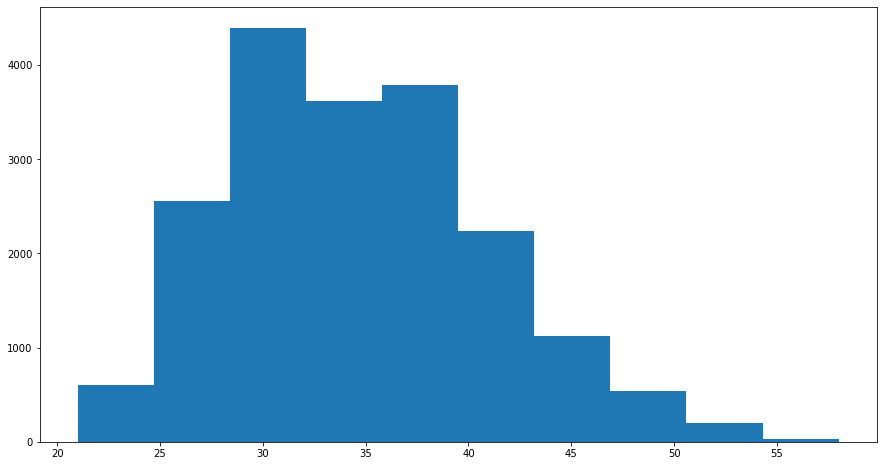

In [13]:
plt.hist(df.Age)

<AxesSubplot:xlabel='Age', ylabel='count'>

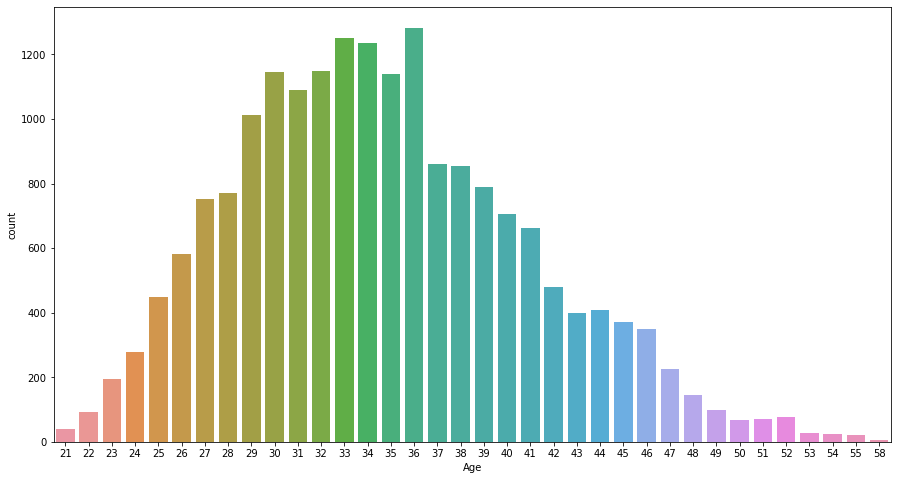

In [14]:
sns.countplot(df.Age)

<AxesSubplot:xlabel='Age', ylabel='Density'>

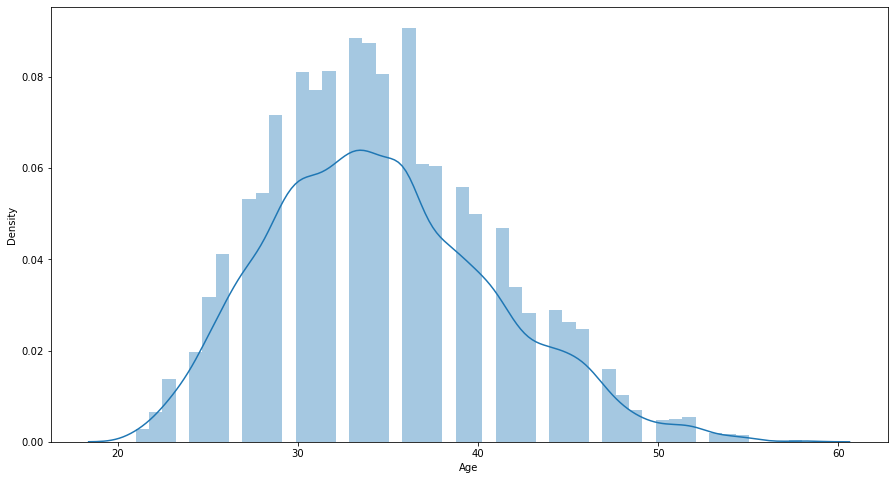

In [15]:
sns.distplot(df.Age)

<AxesSubplot:xlabel='Age'>

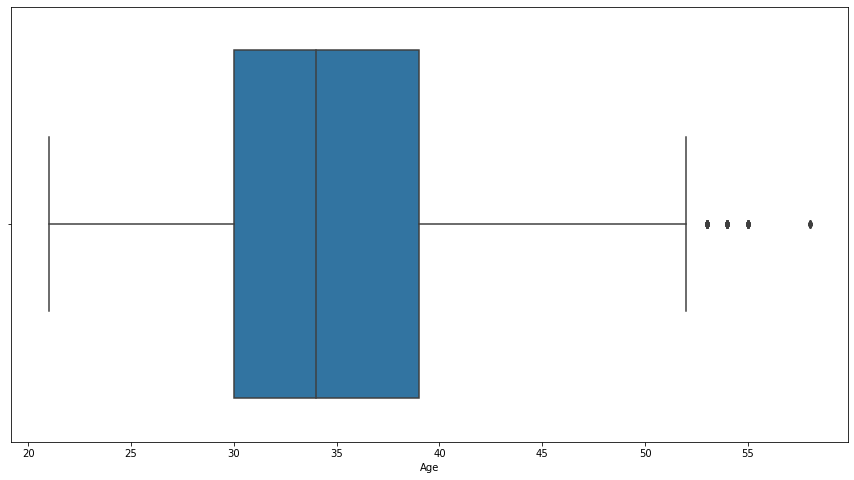

In [16]:
sns.boxplot(df.Age)

In [17]:
IQR=df.Age.quantile(0.75)-df.Age.quantile(0.25)
IQR

9.0

In [18]:
upper_limit=df.Age.quantile(0.75)+(1.5*IQR)
upper_limit

52.5

In [19]:
len(df.Age[df.Age>52.5])

79

In [20]:
df=df[df['Age']<=55]

In [21]:
from scipy.stats import chi2_contingency

In [22]:
m1=ols('Salary ~ Target',data=df).fit()
an1=sm.stats.anova_lm(m1)
print(an1)

t1=pairwise_tukeyhsd(df.Salary,df.Target,alpha=0.05)
print(t1)

               df        sum_sq       mean_sq          F        PR(>F)
Target        1.0  1.856318e+11  1.856318e+11  196.24907  2.280974e-44
Residual  19095.0  1.806194e+13  9.458989e+08        NaN           NaN
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2   meandiff  p-adj    lower      upper    reject
-------------------------------------------------------------
     0      1 -11205.3887 0.001 -12773.2179 -9637.5595   True
-------------------------------------------------------------


# P Value is less than 0.05 ,Null hypothesis is rejected,Hence it is Good variable for target

In [23]:
df.Gender.isna().sum()

0

In [24]:
df.groupby('Gender')['Age'].mean()

Gender
Female    34.926320
Male      34.436819
Name: Age, dtype: float64

<AxesSubplot:xlabel='Gender', ylabel='count'>

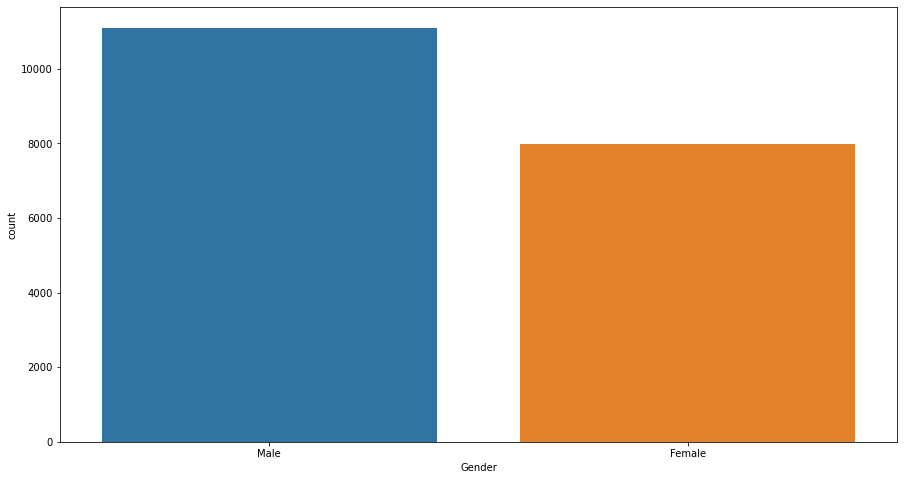

In [25]:
sns.countplot(df.Gender)

<AxesSubplot:xlabel='Gender', ylabel='count'>

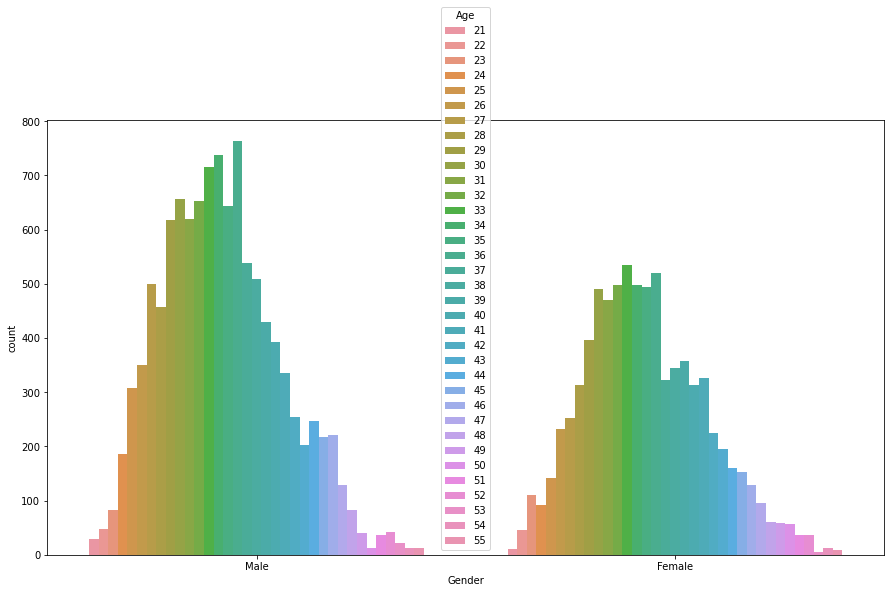

In [26]:
sns.countplot(x='Gender',hue='Age',data=df)

In [27]:
df.groupby('Gender')['Salary'].mean()

Gender
Female    66166.137853
Male      65304.851662
Name: Salary, dtype: float64

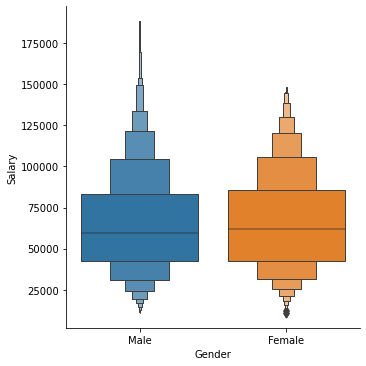

In [28]:
sns.catplot(x='Gender',y='Salary',data=df,kind='boxen')

In [29]:
from scipy.stats import chi2_contingency


In [30]:
a=pd.crosstab(index=df.Gender,columns=df.Target)
print(a)
b=chi2_contingency(a)
print('p value is:',b[1])

Target      0    1
Gender            
Female   7327  667
Male    10155  948
p value is: 0.652605759062233


In [31]:
# p Value is greater than 0.05, hence null hypothesis accepted, can't be a good predictor?, We can't simply decide like that

In [32]:
df.head()

,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,Joining Designation,Designation,Total Business Value,Quarterly Rating,Target
0,1,28,Male,C23,Master,57387,12/24/2015,1,1,2381060,2,0
1,1,28,Male,C23,Master,57387,12/24/2015,1,1,-665480,2,0
2,1,28,Male,C23,Master,57387,12/24/2015,1,1,0,2,1
3,2,31,Male,C7,Master,67016,11-06-2017,2,2,0,1,0
4,2,31,Male,C7,Master,67016,11-06-2017,2,2,0,1,0


In [33]:
df.City.value_counts()

C20    1008
C29     900
C26     869
C22     809
C27     786
C15     761
C10     744
C12     727
C8      712
C16     709
C28     683
C1      677
C6      660
C5      656
C14     648
C3      637
C7      609
C24     607
C21     603
C25     584
C19     579
C4      578
C13     569
C18     544
C23     538
C9      520
C2      472
C11     468
C17     440
Name: City, dtype: int64

In [34]:
df.City.describe()

count     19097
unique       29
top         C20
freq       1008
Name: City, dtype: object

<AxesSubplot:xlabel='City', ylabel='count'>

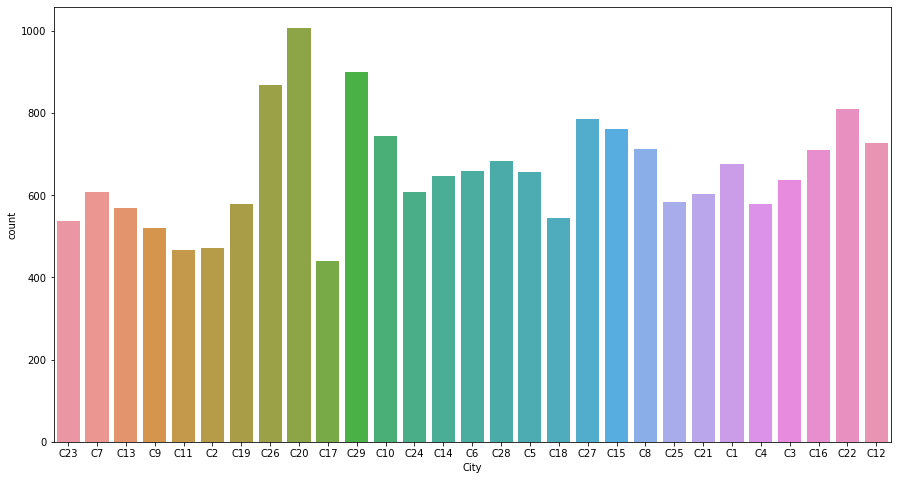

In [35]:
sns.countplot(df.City)

<AxesSubplot:xlabel='City', ylabel='count'>

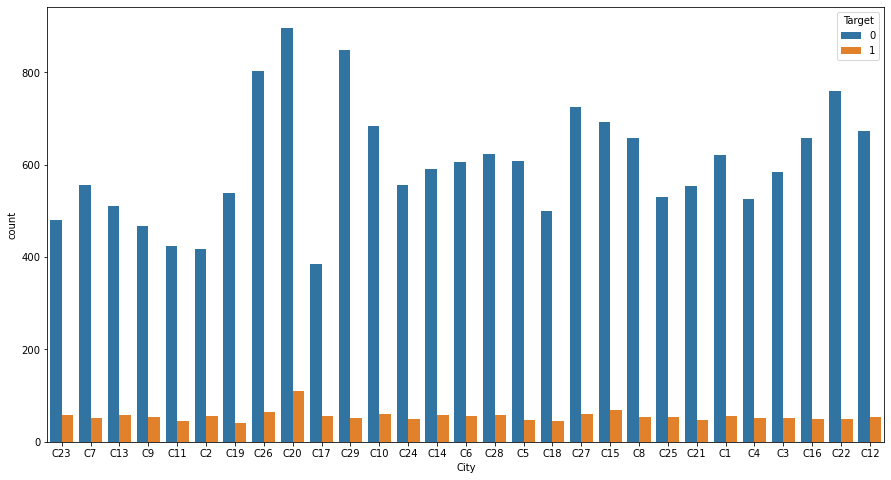

In [36]:
sns.countplot(x='City',hue='Target',data=df)

In [37]:
a=pd.crosstab(index=df.City,columns=df.Target)
print(a)
b=chi2_contingency(a)
print('p value is:',b[1])

Target    0    1
City            
C1      621   56
C10     683   61
C11     423   45
C12     674   53
C13     511   58
C14     590   58
C15     692   69
C16     659   50
C17     385   55
C18     500   44
C19     538   41
C2      417   55
C20     897  111
C21     555   48
C22     759   50
C23     481   57
C24     557   50
C25     530   54
C26     804   65
C27     726   60
C28     624   59
C29     849   51
C3      585   52
C4      526   52
C5      608   48
C6      605   55
C7      557   52
C8      659   53
C9      467   53
p value is: 0.0010234959323050196


In [38]:
# City taking as a good predictor

In [39]:
df.head()

,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,Joining Designation,Designation,Total Business Value,Quarterly Rating,Target
0,1,28,Male,C23,Master,57387,12/24/2015,1,1,2381060,2,0
1,1,28,Male,C23,Master,57387,12/24/2015,1,1,-665480,2,0
2,1,28,Male,C23,Master,57387,12/24/2015,1,1,0,2,1
3,2,31,Male,C7,Master,67016,11-06-2017,2,2,0,1,0
4,2,31,Male,C7,Master,67016,11-06-2017,2,2,0,1,0


In [40]:
df.Education_Level.value_counts()

Bachelor    6857
Master      6327
College     5913
Name: Education_Level, dtype: int64

<AxesSubplot:xlabel='Education_Level', ylabel='count'>

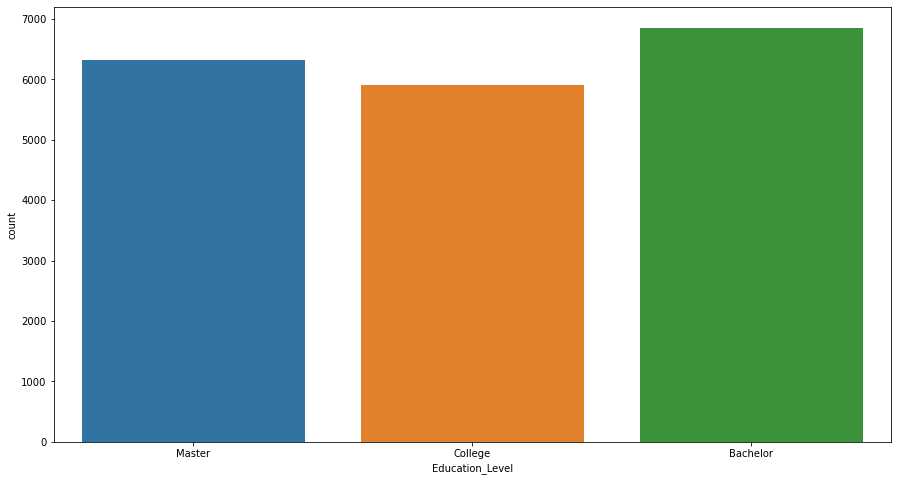

In [41]:
sns.countplot(df.Education_Level)

<AxesSubplot:xlabel='Education_Level', ylabel='count'>

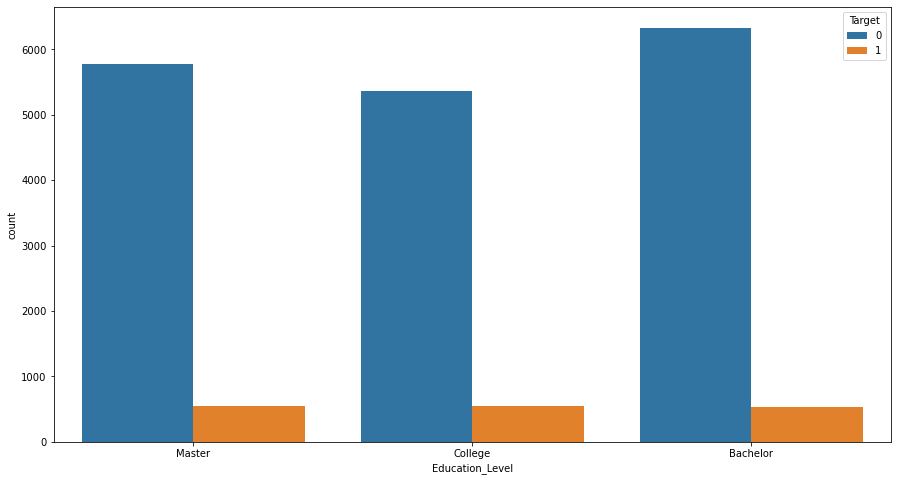

In [42]:
sns.countplot(x='Education_Level',hue='Target',data=df)

In [43]:
df.groupby('Education_Level')['Salary'].mean()

Education_Level
Bachelor    66400.527928
College     60644.080670
Master      69561.404299
Name: Salary, dtype: float64

In [44]:
a=pd.crosstab(index=df.Education_Level,columns=df.Target)
print(a)
b=chi2_contingency(a)
print('p value is:',b[1])

Target              0    1
Education_Level           
Bachelor         6331  526
College          5371  542
Master           5780  547
p value is: 0.008211162151361896


In [45]:
df.head()

,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,Joining Designation,Designation,Total Business Value,Quarterly Rating,Target
0,1,28,Male,C23,Master,57387,12/24/2015,1,1,2381060,2,0
1,1,28,Male,C23,Master,57387,12/24/2015,1,1,-665480,2,0
2,1,28,Male,C23,Master,57387,12/24/2015,1,1,0,2,1
3,2,31,Male,C7,Master,67016,11-06-2017,2,2,0,1,0
4,2,31,Male,C7,Master,67016,11-06-2017,2,2,0,1,0


In [46]:
df.Salary.describe()

count     19097.000000
mean      65665.385872
std       30912.301564
min       10747.000000
25%       42400.000000
50%       60087.000000
75%       83969.000000
max      188418.000000
Name: Salary, dtype: float64

In [47]:
df.Salary.value_counts()

48747     57
109652    32
68356     30
67490     28
42260     28
          ..
71338      1
77597      1
53025      1
34600      1
57356      1
Name: Salary, Length: 2382, dtype: int64

(array([1820., 3861., 4659., 3528., 2363., 1432.,  945.,  373.,   92.,
          24.]),
 array([ 10747. ,  28514.1,  46281.2,  64048.3,  81815.4,  99582.5,
        117349.6, 135116.7, 152883.8, 170650.9, 188418. ]),
 <BarContainer object of 10 artists>)

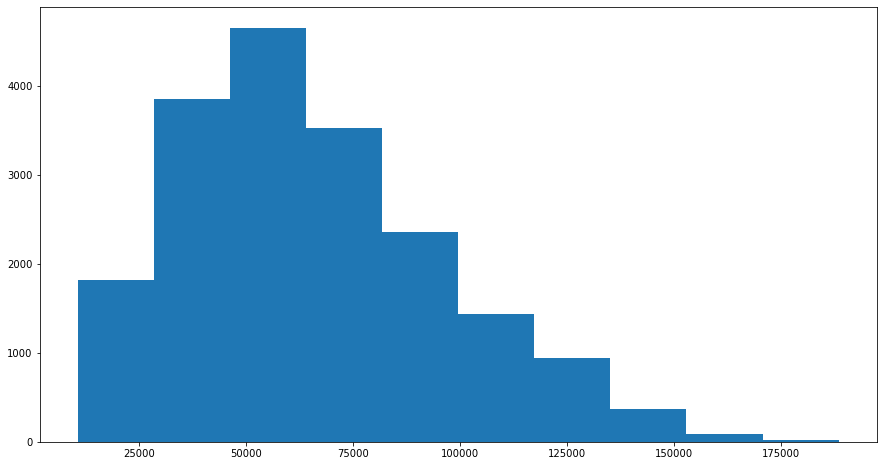

In [48]:
plt.hist(df.Salary)

<AxesSubplot:xlabel='Salary', ylabel='Density'>

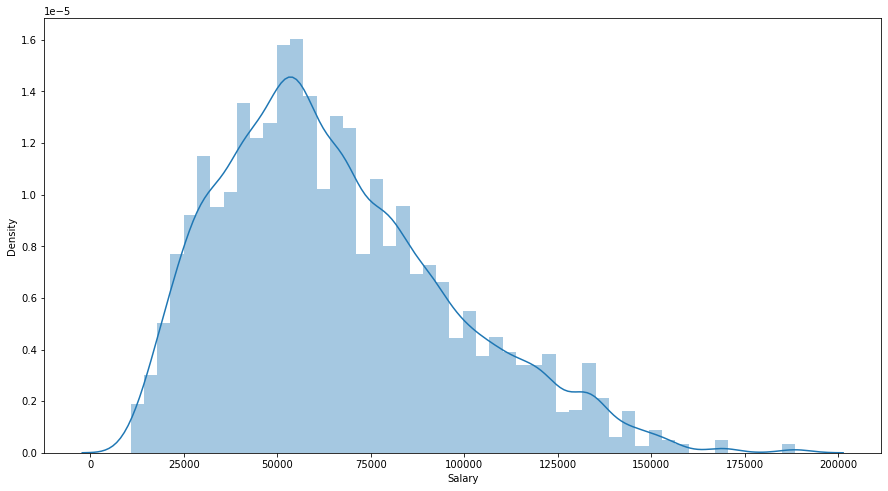

In [49]:
sns.distplot(df.Salary)

<AxesSubplot:xlabel='Salary'>

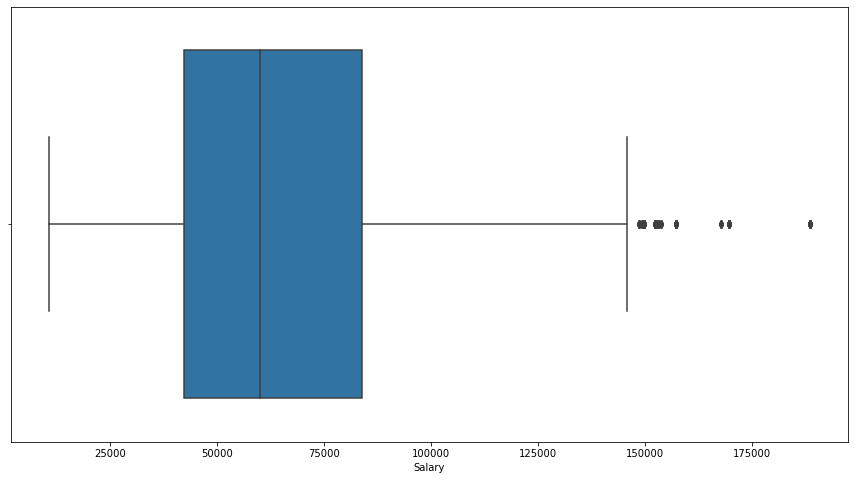

In [50]:
sns.boxplot(df.Salary)

In [51]:
IQR=df.Salary.quantile(0.75)-df.Salary.quantile(0.25)
IQR

41569.0

In [52]:
upper_limit=df.Salary.quantile(0.75)+(1.5*IQR)
upper_limit

146322.5

In [53]:
len(df.Salary[df.Salary>146322.5])

188

In [54]:
df=df[df['Age']<=150000]

In [55]:
m=ols('Salary ~ Target',data=df).fit()
an=sm.stats.anova_lm(m)
print(an)

t=pairwise_tukeyhsd(df.Salary,df.Target,alpha=0.05)
print(t)

               df        sum_sq       mean_sq          F        PR(>F)
Target        1.0  1.856318e+11  1.856318e+11  196.24907  2.280974e-44
Residual  19095.0  1.806194e+13  9.458989e+08        NaN           NaN
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2   meandiff  p-adj    lower      upper    reject
-------------------------------------------------------------
     0      1 -11205.3887 0.001 -12773.2179 -9637.5595   True
-------------------------------------------------------------


In [56]:
# Good one

In [57]:
df.head()

,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,Joining Designation,Designation,Total Business Value,Quarterly Rating,Target
0,1,28,Male,C23,Master,57387,12/24/2015,1,1,2381060,2,0
1,1,28,Male,C23,Master,57387,12/24/2015,1,1,-665480,2,0
2,1,28,Male,C23,Master,57387,12/24/2015,1,1,0,2,1
3,2,31,Male,C7,Master,67016,11-06-2017,2,2,0,1,0
4,2,31,Male,C7,Master,67016,11-06-2017,2,2,0,1,0


In [58]:
df.Dateofjoining.value_counts()

7/23/2012     192
7/31/2017     150
07-04-2016    146
4/25/2013     134
10/21/2015    118
             ... 
12-06-2017      1
6/22/2015       1
12/25/2017      1
12/27/2017      1
1/26/2015       1
Name: Dateofjoining, Length: 869, dtype: int64

In [59]:
df.Dateofjoining.describe()

count         19097
unique          869
top       7/23/2012
freq            192
Name: Dateofjoining, dtype: object

In [60]:
# I decided to drop this variable

In [61]:
df.drop('Dateofjoining',axis=1,inplace = True)

In [62]:
df.head()

,Emp_ID,Age,Gender,City,Education_Level,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,Target
0,1,28,Male,C23,Master,57387,1,1,2381060,2,0
1,1,28,Male,C23,Master,57387,1,1,-665480,2,0
2,1,28,Male,C23,Master,57387,1,1,0,2,1
3,2,31,Male,C7,Master,67016,2,2,0,1,0
4,2,31,Male,C7,Master,67016,2,2,0,1,0


In [63]:
df['Joining Designation'].value_counts()

1    9824
2    5955
3    2847
4     341
5     130
Name: Joining Designation, dtype: int64

<AxesSubplot:xlabel='Joining Designation', ylabel='count'>

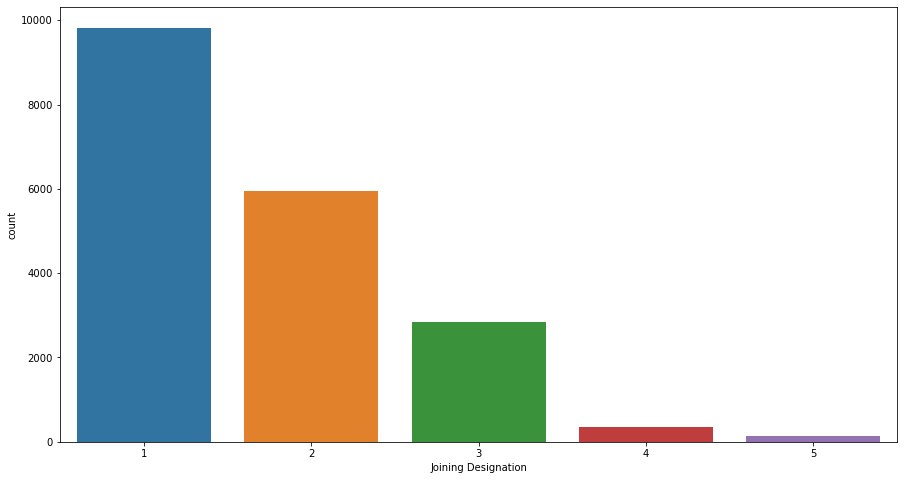

In [64]:
sns.countplot(df['Joining Designation'])

(array([9824.,    0., 5955.,    0.,    0., 2847.,    0.,  341.,    0.,
         130.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

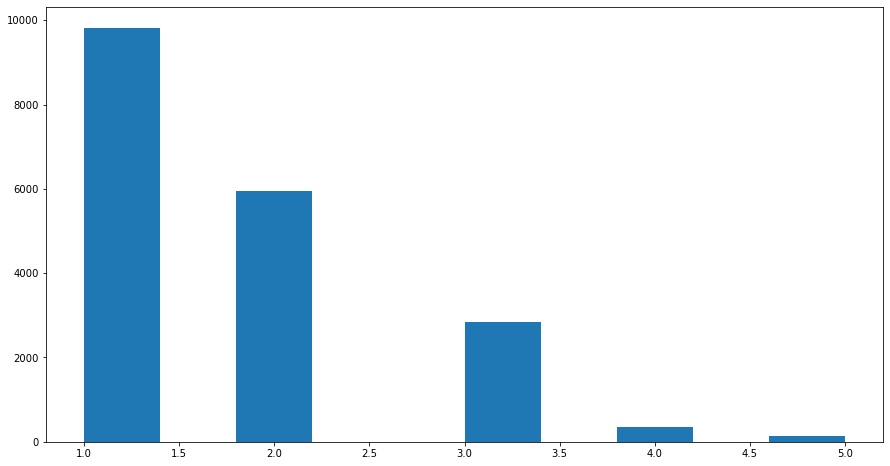

In [65]:
plt.hist(df['Joining Designation'])

In [66]:
df.groupby('Joining Designation')['Salary'].mean()

Joining Designation
1     56713.812093
2     68904.659110
3     81805.143309
4    106439.120235
5    133331.969231
Name: Salary, dtype: float64

<AxesSubplot:xlabel='Joining Designation', ylabel='count'>

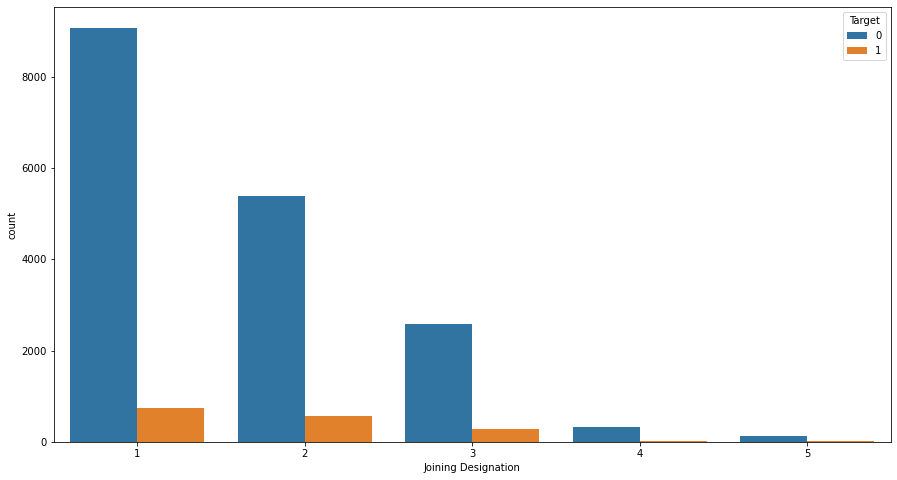

In [67]:
sns.countplot(x='Joining Designation',hue='Target',data=df)

<AxesSubplot:xlabel='Joining Designation', ylabel='count'>

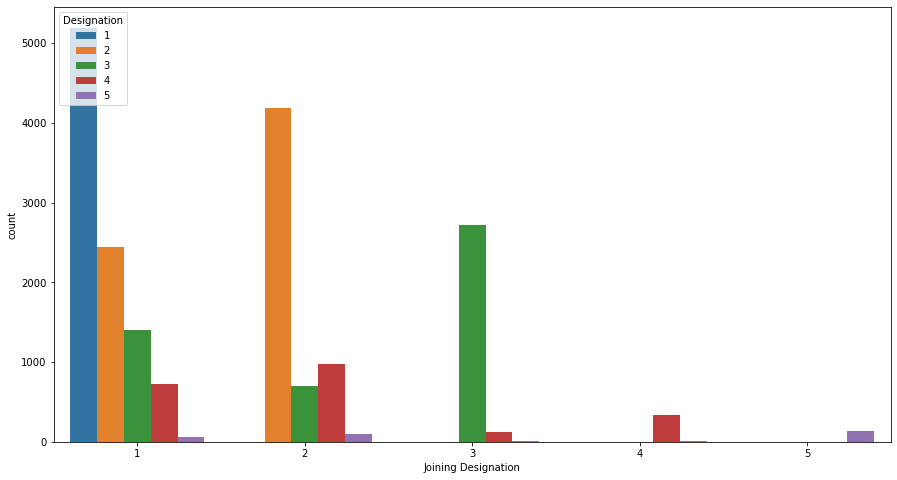

In [68]:
sns.countplot(x='Joining Designation',hue='Designation',data=df)

In [69]:
a=pd.crosstab(index=df['Joining Designation'],columns=df.Target)
print(a)
b=chi2_contingency(a)
print('p value is:',b[1])

Target                  0    1
Joining Designation           
1                    9073  751
2                    5395  560
3                    2573  274
4                     319   22
5                     122    8
p value is: 0.00012988937359105602


In [70]:
df.head()

,Emp_ID,Age,Gender,City,Education_Level,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,Target
0,1,28,Male,C23,Master,57387,1,1,2381060,2,0
1,1,28,Male,C23,Master,57387,1,1,-665480,2,0
2,1,28,Male,C23,Master,57387,1,1,0,2,1
3,2,31,Male,C7,Master,67016,2,2,0,1,0
4,2,31,Male,C7,Master,67016,2,2,0,1,0


In [71]:
a=pd.crosstab(index=df['Joining Designation'],columns=df.Designation)
print(a)
b=chi2_contingency(a)
print('p value is:',b[1])

Designation             1     2     3    4    5
Joining Designation                            
1                    5195  2441  1405  721   62
2                       0  4186   698  972   99
3                       0     0  2723  117    7
4                       0     0     0  334    7
5                       0     0     0    0  130
p value is: 0.0


<AxesSubplot:xlabel='Designation', ylabel='count'>

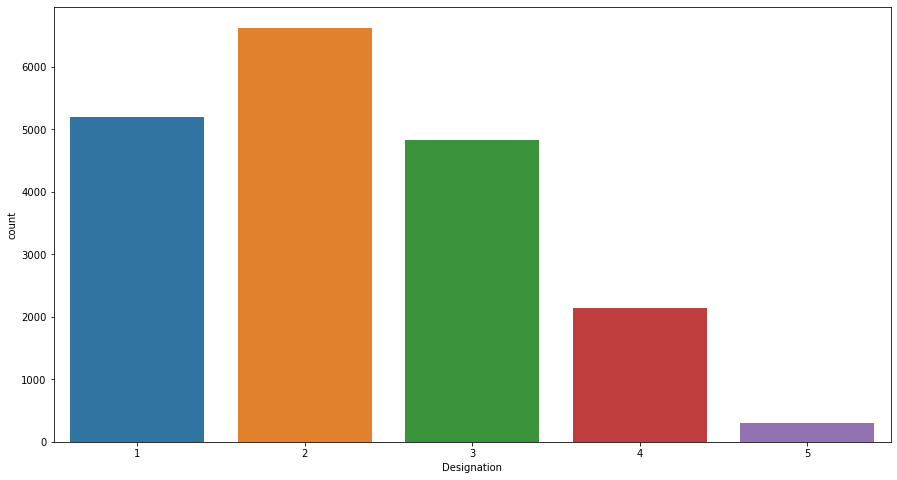

In [72]:
sns.countplot(df.Designation)

In [73]:
a=pd.crosstab(index=df['Designation'],columns=df.Target)
print(a)
b=chi2_contingency(a)
print('p value is:',b[1])

Target          0    1
Designation           
1            4600  595
2            6027  600
3            4489  337
4            2074   70
5             292   13
p value is: 3.175296169632843e-33


In [74]:
df.head()

,Emp_ID,Age,Gender,City,Education_Level,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,Target
0,1,28,Male,C23,Master,57387,1,1,2381060,2,0
1,1,28,Male,C23,Master,57387,1,1,-665480,2,0
2,1,28,Male,C23,Master,57387,1,1,0,2,1
3,2,31,Male,C7,Master,67016,2,2,0,1,0
4,2,31,Male,C7,Master,67016,2,2,0,1,0


In [75]:
df['Total Business Value'].describe()

count    1.909700e+04
mean     5.716982e+05
std      1.128489e+06
min     -6.000000e+06
25%      0.000000e+00
50%      2.500000e+05
75%      6.996500e+05
max      3.374772e+07
Name: Total Business Value, dtype: float64

In [76]:
df['Total Business Value'].value_counts()

0          6499
200000      288
250000      148
500000      131
300000      107
           ... 
979270        1
1385310       1
431240        1
1028940       1
867750        1
Name: Total Business Value, Length: 10176, dtype: int64

In [77]:
df['Total Business Value'].isna().sum()

0

(array([5.0000e+00, 1.7936e+04, 1.0140e+03, 9.9000e+01, 3.1000e+01,
        9.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-6000000., -2025228.,  1949544.,  5924316.,  9899088., 13873860.,
        17848632., 21823404., 25798176., 29772948., 33747720.]),
 <BarContainer object of 10 artists>)

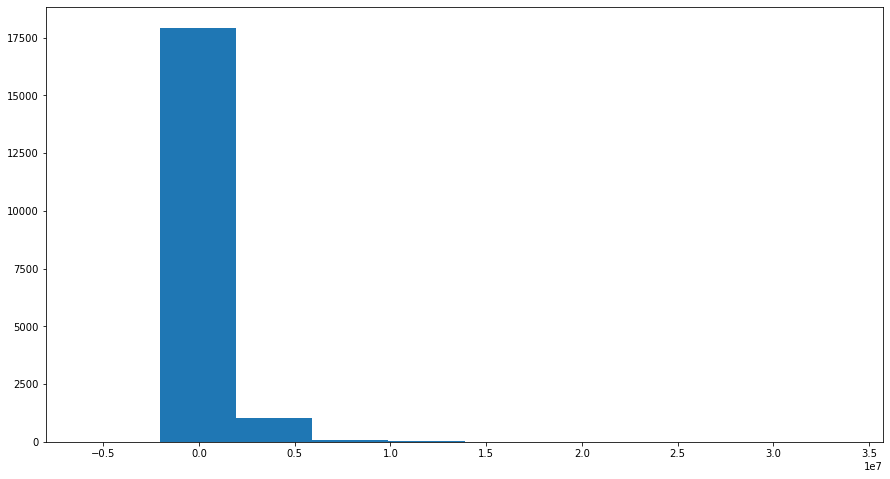

In [78]:
plt.hist(df['Total Business Value'])

<AxesSubplot:xlabel='Total Business Value', ylabel='Density'>

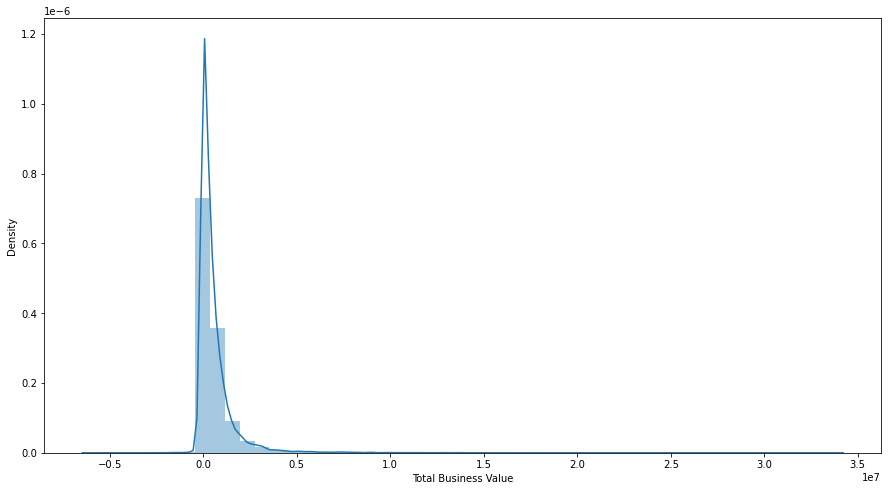

In [79]:
sns.distplot(df['Total Business Value'])

<AxesSubplot:xlabel='Total Business Value'>

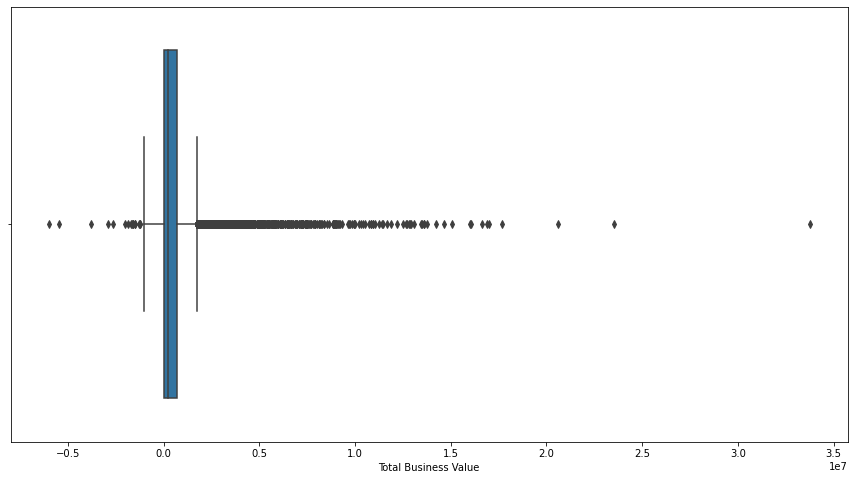

In [80]:
sns.boxplot(df['Total Business Value'])

In [81]:
# decided not not to remove outliers . I will standarisethis variale

In [82]:
df.head()

,Emp_ID,Age,Gender,City,Education_Level,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,Target
0,1,28,Male,C23,Master,57387,1,1,2381060,2,0
1,1,28,Male,C23,Master,57387,1,1,-665480,2,0
2,1,28,Male,C23,Master,57387,1,1,0,2,1
3,2,31,Male,C7,Master,67016,2,2,0,1,0
4,2,31,Male,C7,Master,67016,2,2,0,1,0


In [83]:
df['Quarterly Rating'].value_counts()

1    7679
2    5553
3    3888
4    1977
Name: Quarterly Rating, dtype: int64

<AxesSubplot:xlabel='Quarterly Rating', ylabel='count'>

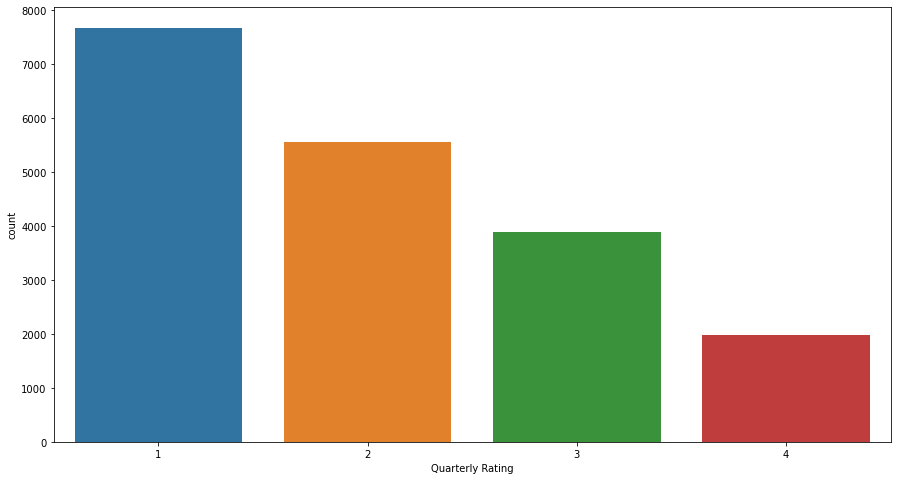

In [84]:
sns.countplot(df['Quarterly Rating'])

In [85]:
a=pd.crosstab(index=df['Quarterly Rating'],columns=df.Target)
print(a)
b=chi2_contingency(a)
print('p value is:',b[1])

Target               0     1
Quarterly Rating            
1                 6247  1432
2                 5407   146
3                 3861    27
4                 1967    10
p value is: 0.0


# Data cleaning

In [86]:
cp=df.copy()

In [87]:

ns=cp.groupby('Emp_ID')['Emp_ID','Age','Gender','City','Education_Level','Salary','Designation',"Total Business Value",
                       'Quarterly Rating','Target'].tail(1)
ns.reset_index(drop=True,inplace=True)
ns1=cp.groupby('Emp_ID').agg({'Total Business Value':'sum'})
ns1.reset_index(drop=True,inplace=True)
df3=pd.concat([ns,ns1],axis=1,ignore_index=False)

In [88]:
df4=df3

In [89]:
df4.to_csv('Anavidfinaldata.csv')

In [90]:
# I combined repeated Emp_id variables so i comes to singles value with each unique ID

In [91]:
# this is my final data to proceed to the model

In [92]:
df4=pd.read_csv('Anavidfinaldata1.csv')

In [93]:
df4

,Unnamed: 0,Emp_ID,Age,Gender,City,Education_Level,Salary,Designation,Total Business Value,Quarterly Rating,Target
0,0,1,28,1,15,2,57387,1,0,2,1
1,1,2,31,1,26,2,67016,2,0,1,0
2,2,4,43,1,4,2,65603,2,0,1,1
3,3,5,29,1,28,1,46368,1,0,1,1
4,4,6,31,0,2,0,78728,3,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
2375,2375,2784,34,1,16,1,82815,3,505480,4,0
2376,2376,2785,34,0,28,1,12105,1,0,1,1
2377,2377,2786,45,1,10,1,35370,2,0,1,1
2378,2378,2787,28,0,12,2,69498,1,0,1,1


In [94]:
emp=df4[['Emp_ID']]

In [95]:
df4.drop('Emp_ID',axis=1,inplace = True)

In [96]:
df4.drop('Unnamed: 0',axis=1,inplace = True)

In [97]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [98]:
X = df4.drop(columns='Target')
y = df4['Target']

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state = 45)

In [100]:
abc = AdaBoostClassifier(n_estimators=100, learning_rate=1)
model = abc.fit(X_train, y_train)

In [101]:
y_predabc = abc.predict(X_test)


In [102]:
from sklearn.metrics import accuracy_score

print(round(accuracy_score(y_test,y_predabc), 2))
 

0.83


In [103]:
df

,Emp_ID,Age,Gender,City,Education_Level,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,Target
0,1,28,Male,C23,Master,57387,1,1,2381060,2,0
1,1,28,Male,C23,Master,57387,1,1,-665480,2,0
2,1,28,Male,C23,Master,57387,1,1,0,2,1
3,2,31,Male,C7,Master,67016,2,2,0,1,0
4,2,31,Male,C7,Master,67016,2,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
19099,2788,30,Male,C27,Master,70254,2,2,740280,3,0
19100,2788,30,Male,C27,Master,70254,2,2,448370,3,0
19101,2788,30,Male,C27,Master,70254,2,2,0,2,0
19102,2788,30,Male,C27,Master,70254,2,2,200420,2,0


In [104]:
df4

,Age,Gender,City,Education_Level,Salary,Designation,Total Business Value,Quarterly Rating,Target
0,28,1,15,2,57387,1,0,2,1
1,31,1,26,2,67016,2,0,1,0
2,43,1,4,2,65603,2,0,1,1
3,29,1,28,1,46368,1,0,1,1
4,31,0,2,0,78728,3,0,2,0
...,...,...,...,...,...,...,...,...,...
2375,34,1,16,1,82815,3,505480,4,0
2376,34,0,28,1,12105,1,0,1,1
2377,45,1,10,1,35370,2,0,1,1
2378,28,0,12,2,69498,1,0,1,1


In [105]:
sk=df4[['Total Business Value']]  # standardizing the variables

In [106]:
 from sklearn.preprocessing import StandardScaler

In [107]:
sc=StandardScaler()

In [108]:
cs=sc.fit_transform(sk)

In [109]:
cs

array([[-0.2350151 ],
       [-0.2350151 ],
       [-0.2350151 ],
       ...,
       [-0.2350151 ],
       [-0.2350151 ],
       [ 0.12762794]])

In [110]:
std=pd.DataFrame(cs,columns=sk.columns)

In [111]:
std

,Total Business Value
0,-0.235015
1,-0.235015
2,-0.235015
3,-0.235015
4,-0.235015
...,...
2375,0.210471
2376,-0.235015
2377,-0.235015
2378,-0.235015


In [112]:
remai=df4[['Age','Gender','City','Education_Level','Salary','Designation','Quarterly Rating','Target']]

In [113]:
remai

,Age,Gender,City,Education_Level,Salary,Designation,Quarterly Rating,Target
0,28,1,15,2,57387,1,2,1
1,31,1,26,2,67016,2,1,0
2,43,1,4,2,65603,2,1,1
3,29,1,28,1,46368,1,1,1
4,31,0,2,0,78728,3,2,0
...,...,...,...,...,...,...,...,...
2375,34,1,16,1,82815,3,4,0
2376,34,0,28,1,12105,1,1,1
2377,45,1,10,1,35370,2,1,1
2378,28,0,12,2,69498,1,1,1


In [114]:
df5=pd.concat([std,remai],axis=1)

In [115]:
df5

,Total Business Value,Age,Gender,City,Education_Level,Salary,Designation,Quarterly Rating,Target
0,-0.235015,28,1,15,2,57387,1,2,1
1,-0.235015,31,1,26,2,67016,2,1,0
2,-0.235015,43,1,4,2,65603,2,1,1
3,-0.235015,29,1,28,1,46368,1,1,1
4,-0.235015,31,0,2,0,78728,3,2,0
...,...,...,...,...,...,...,...,...,...
2375,0.210471,34,1,16,1,82815,3,4,0
2376,-0.235015,34,0,28,1,12105,1,1,1
2377,-0.235015,45,1,10,1,35370,2,1,1
2378,-0.235015,28,0,12,2,69498,1,1,1


# Adaboost classifier

In [116]:
x1 = df5.drop(columns='Target')
y1 = df5['Target']

In [117]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(x1,y1,test_size=0.30, random_state = 45)

In [118]:
abc = AdaBoostClassifier(n_estimators=100, learning_rate=1)
model3 = abc.fit(X_train1, y_train1)

In [119]:
y_predabc1 = model3.predict(X_test1)


In [120]:
from sklearn.metrics import accuracy_score

print(round(accuracy_score(y_test1,y_predabc1), 2))

0.83


In [121]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test1,y_predabc1)
print(confusion_matrix)

[[143  80]
 [ 38 453]]


In [122]:
from sklearn.metrics import classification_report
print(classification_report(y_test1,y_predabc1))

              precision    recall  f1-score   support

           0       0.79      0.64      0.71       223
           1       0.85      0.92      0.88       491

    accuracy                           0.83       714
   macro avg       0.82      0.78      0.80       714
weighted avg       0.83      0.83      0.83       714



# Random Forest Classifier

In [123]:
from sklearn.ensemble import RandomForestClassifier

In [124]:
clf = RandomForestClassifier(n_estimators = 100)
rf=clf.fit(X_train1, y_train1)
y_predrf = rf.predict(X_test1)
from sklearn.metrics import accuracy_score

print(round(accuracy_score(y_test1,y_predrf), 2))

0.83


In [125]:

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test1,y_predrf)
print(confusion_matrix)

[[153  70]
 [ 53 438]]


In [126]:
from sklearn.metrics import classification_report
print(classification_report(y_test1,y_predrf))

              precision    recall  f1-score   support

           0       0.74      0.69      0.71       223
           1       0.86      0.89      0.88       491

    accuracy                           0.83       714
   macro avg       0.80      0.79      0.80       714
weighted avg       0.82      0.83      0.83       714



In [127]:
df5

,Total Business Value,Age,Gender,City,Education_Level,Salary,Designation,Quarterly Rating,Target
0,-0.235015,28,1,15,2,57387,1,2,1
1,-0.235015,31,1,26,2,67016,2,1,0
2,-0.235015,43,1,4,2,65603,2,1,1
3,-0.235015,29,1,28,1,46368,1,1,1
4,-0.235015,31,0,2,0,78728,3,2,0
...,...,...,...,...,...,...,...,...,...
2375,0.210471,34,1,16,1,82815,3,4,0
2376,-0.235015,34,0,28,1,12105,1,1,1
2377,-0.235015,45,1,10,1,35370,2,1,1
2378,-0.235015,28,0,12,2,69498,1,1,1


In [128]:
empco=pd.concat([emp,df5],axis=1)

In [129]:
empco

,Emp_ID,Total Business Value,Age,Gender,City,Education_Level,Salary,Designation,Quarterly Rating,Target
0,1,-0.235015,28,1,15,2,57387,1,2,1
1,2,-0.235015,31,1,26,2,67016,2,1,0
2,4,-0.235015,43,1,4,2,65603,2,1,1
3,5,-0.235015,29,1,28,1,46368,1,1,1
4,6,-0.235015,31,0,2,0,78728,3,2,0
...,...,...,...,...,...,...,...,...,...,...
2375,2784,0.210471,34,1,16,1,82815,3,4,0
2376,2785,-0.235015,34,0,28,1,12105,1,1,1
2377,2786,-0.235015,45,1,10,1,35370,2,1,1
2378,2787,-0.235015,28,0,12,2,69498,1,1,1


In [130]:
tes=pd.read_csv('test_hXY9mYw.csv')


In [131]:
tes

,Emp_ID
0,394
1,173
2,1090
3,840
4,308
...,...
736,2134
737,2255
738,448
739,1644


In [132]:
tes1=pd.merge(tes,empco,on='Emp_ID')


In [133]:
tes1.drop(['Emp_ID','Target'],axis=1,inplace=True)


In [134]:
pre1= rf.predict(tes1)

In [135]:
pre1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [136]:
submission1=pd.read_csv('sample_submission_znWiLZ4.csv')


In [137]:
submission1

,Emp_ID,Target
0,394,0
1,173,0
2,1090,0
3,840,0
4,308,0
...,...,...
736,2134,0
737,2255,0
738,448,0
739,1644,0


In [138]:
submission1['Target']=pre1


In [139]:
submission1.to_csv('sub2.csv',index=False)


In [140]:
df5

,Total Business Value,Age,Gender,City,Education_Level,Salary,Designation,Quarterly Rating,Target
0,-0.235015,28,1,15,2,57387,1,2,1
1,-0.235015,31,1,26,2,67016,2,1,0
2,-0.235015,43,1,4,2,65603,2,1,1
3,-0.235015,29,1,28,1,46368,1,1,1
4,-0.235015,31,0,2,0,78728,3,2,0
...,...,...,...,...,...,...,...,...,...
2375,0.210471,34,1,16,1,82815,3,4,0
2376,-0.235015,34,0,28,1,12105,1,1,1
2377,-0.235015,45,1,10,1,35370,2,1,1
2378,-0.235015,28,0,12,2,69498,1,1,1


# KNN CLASSIFIER

In [141]:
x3 = df5.drop(columns='Target')
y3= df5['Target']

In [142]:
from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(x3,y3,test_size=0.30, random_state = 45)

In [143]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors =3)
print(knn) 
mpm_knn = knn.fit(X_train3, y_train3)
print(mpm_knn)
score=mpm_knn.score(X_train3,y_train3)
print(score)

KNeighborsClassifier(n_neighbors=3)
KNeighborsClassifier(n_neighbors=3)
0.7995198079231692


In [144]:
from sklearn.metrics import accuracy_score
y_predkn = mpm_knn.predict(X_test3)
accuracy_score(y_test3, y_predkn) 

0.6260504201680672

In [145]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test3, y_predkn)
print(confusion_matrix)

[[ 79 144]
 [123 368]]


In [146]:
from sklearn.metrics import classification_report
print(classification_report(y_test3, y_predkn))

              precision    recall  f1-score   support

           0       0.39      0.35      0.37       223
           1       0.72      0.75      0.73       491

    accuracy                           0.63       714
   macro avg       0.55      0.55      0.55       714
weighted avg       0.62      0.63      0.62       714



In [147]:
df

,Emp_ID,Age,Gender,City,Education_Level,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,Target
0,1,28,Male,C23,Master,57387,1,1,2381060,2,0
1,1,28,Male,C23,Master,57387,1,1,-665480,2,0
2,1,28,Male,C23,Master,57387,1,1,0,2,1
3,2,31,Male,C7,Master,67016,2,2,0,1,0
4,2,31,Male,C7,Master,67016,2,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
19099,2788,30,Male,C27,Master,70254,2,2,740280,3,0
19100,2788,30,Male,C27,Master,70254,2,2,448370,3,0
19101,2788,30,Male,C27,Master,70254,2,2,0,2,0
19102,2788,30,Male,C27,Master,70254,2,2,200420,2,0


In [148]:
df5

,Total Business Value,Age,Gender,City,Education_Level,Salary,Designation,Quarterly Rating,Target
0,-0.235015,28,1,15,2,57387,1,2,1
1,-0.235015,31,1,26,2,67016,2,1,0
2,-0.235015,43,1,4,2,65603,2,1,1
3,-0.235015,29,1,28,1,46368,1,1,1
4,-0.235015,31,0,2,0,78728,3,2,0
...,...,...,...,...,...,...,...,...,...
2375,0.210471,34,1,16,1,82815,3,4,0
2376,-0.235015,34,0,28,1,12105,1,1,1
2377,-0.235015,45,1,10,1,35370,2,1,1
2378,-0.235015,28,0,12,2,69498,1,1,1


In [149]:
 from sklearn.preprocessing import StandardScaler

In [150]:
stss=df5[['Age','Salary']]  # Again standarzing varibles

In [151]:
ss=StandardScaler()

In [152]:
sst=ss.fit_transform(stss)

In [153]:
sst

array([[-0.94807687, -0.06906374],
       [-0.44493514,  0.27026105],
       [ 1.56763179,  0.2204671 ],
       ...,
       [ 1.90305961, -0.84494014],
       [-0.94807687,  0.35772643],
       [-0.61264905,  0.38436778]])

In [154]:
sst=pd.DataFrame(sst,columns=stss.columns)

In [155]:
sst

,Age,Salary
0,-0.948077,-0.069064
1,-0.444935,0.270261
2,1.567632,0.220467
3,-0.780363,-0.457372
4,-0.444935,0.682991
...,...,...
2375,0.058207,0.827016
2376,0.058207,-1.664796
2377,1.903060,-0.844940
2378,-0.948077,0.357726


In [156]:
reman2=df5[['Total Business Value','Gender','City','Education_Level','Designation','Quarterly Rating','Target']]

In [157]:
df6=pd.concat([sst,reman2],axis=1)

In [158]:
df6

,Age,Salary,Total Business Value,Gender,City,Education_Level,Designation,Quarterly Rating,Target
0,-0.948077,-0.069064,-0.235015,1,15,2,1,2,1
1,-0.444935,0.270261,-0.235015,1,26,2,2,1,0
2,1.567632,0.220467,-0.235015,1,4,2,2,1,1
3,-0.780363,-0.457372,-0.235015,1,28,1,1,1,1
4,-0.444935,0.682991,-0.235015,0,2,0,3,2,0
...,...,...,...,...,...,...,...,...,...
2375,0.058207,0.827016,0.210471,1,16,1,3,4,0
2376,0.058207,-1.664796,-0.235015,0,28,1,1,1,1
2377,1.903060,-0.844940,-0.235015,1,10,1,2,1,1
2378,-0.948077,0.357726,-0.235015,0,12,2,1,1,1


In [159]:
x4 = df6.drop(columns='Target')
y4= df6['Target']

In [160]:
from sklearn.model_selection import train_test_split
X_train4, X_test4, y_train4, y_test4 = train_test_split(x4,y4,test_size=0.30, random_state = 45)

In [161]:
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors =9)
print(knn1) 
mpm_knn1 = knn1.fit(X_train4, y_train4)
print(mpm_knn1)
score1=mpm_knn1.score(X_train4,y_train4)
print(score1)

KNeighborsClassifier(n_neighbors=9)
KNeighborsClassifier(n_neighbors=9)
0.804921968787515


In [162]:
from sklearn.metrics import accuracy_score
y_predkn1 = mpm_knn1.predict(X_test4)
accuracy_score(y_test4, y_predkn1) 

0.7759103641456583

In [163]:
tes2=pd.concat([emp,df6],axis=1)

In [164]:
tes2

,Emp_ID,Age,Salary,Total Business Value,Gender,City,Education_Level,Designation,Quarterly Rating,Target
0,1,-0.948077,-0.069064,-0.235015,1,15,2,1,2,1
1,2,-0.444935,0.270261,-0.235015,1,26,2,2,1,0
2,4,1.567632,0.220467,-0.235015,1,4,2,2,1,1
3,5,-0.780363,-0.457372,-0.235015,1,28,1,1,1,1
4,6,-0.444935,0.682991,-0.235015,0,2,0,3,2,0
...,...,...,...,...,...,...,...,...,...,...
2375,2784,0.058207,0.827016,0.210471,1,16,1,3,4,0
2376,2785,0.058207,-1.664796,-0.235015,0,28,1,1,1,1
2377,2786,1.903060,-0.844940,-0.235015,1,10,1,2,1,1
2378,2787,-0.948077,0.357726,-0.235015,0,12,2,1,1,1


In [165]:
tes

,Emp_ID
0,394
1,173
2,1090
3,840
4,308
...,...
736,2134
737,2255
738,448
739,1644


In [166]:
testm=pd.merge(tes,tes2,on='Emp_ID')

In [167]:
testm.drop(['Emp_ID','Target'],axis=1,inplace=True)


In [168]:
pre3= mpm_knn1.predict(testm)


In [169]:
pre3

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,

In [170]:
sub3=pd.read_csv('sample_submission_znWiLZ4.csv')


In [171]:

sub3['Target']=pre3

In [172]:
sub3.to_csv('sub3.csv',index=False)


In [173]:
df6

,Age,Salary,Total Business Value,Gender,City,Education_Level,Designation,Quarterly Rating,Target
0,-0.948077,-0.069064,-0.235015,1,15,2,1,2,1
1,-0.444935,0.270261,-0.235015,1,26,2,2,1,0
2,1.567632,0.220467,-0.235015,1,4,2,2,1,1
3,-0.780363,-0.457372,-0.235015,1,28,1,1,1,1
4,-0.444935,0.682991,-0.235015,0,2,0,3,2,0
...,...,...,...,...,...,...,...,...,...
2375,0.058207,0.827016,0.210471,1,16,1,3,4,0
2376,0.058207,-1.664796,-0.235015,0,28,1,1,1,1
2377,1.903060,-0.844940,-0.235015,1,10,1,2,1,1
2378,-0.948077,0.357726,-0.235015,0,12,2,1,1,1


# SUPPORT VECTOR MACHINE CLASSIFIER

In [174]:
from sklearn import model_selection
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc

In [175]:
#SVC - Suppot Vector Classifier
svc =svm.SVC( class_weight='balanced',probability=True) #RDF BY DEFAULT
td_svc = svc.fit(X_train4, y_train4)
td_svc.get_params()
sco=svc.score(X_train4,y_train4)
print(sco)


0.8091236494597839


In [176]:
td_svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': 'balanced',
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [177]:
from sklearn.metrics import accuracy_score
y_predsvc = svc.predict(X_test4)
accuracy_score(y_test4,y_predsvc)

0.8151260504201681

In [178]:
# kernels

In [179]:
svc1 =svm.SVC(class_weight='balanced', probability=True, kernel='linear') 
td_svc1 = svc1.fit(X_train4, y_train4)
td_svc1.get_params()
sco=svc1.score(X_train4,y_train4)
print(sco)

0.8205282112845138


In [180]:
from sklearn.metrics import accuracy_score
y_predsvc1 = svc1.predict(X_test4)
accuracy_score(y_test4,y_predsvc1)

0.8305322128851541

In [181]:
svc2=svm.SVC(class_weight='balanced', probability=True, kernel='poly') 
td_svc2 = svc2.fit(X_train4, y_train4)
td_svc2.get_params()
s=svc2.score(X_train4,y_train4)
print(s)

0.7719087635054022


In [182]:
from sklearn.metrics import accuracy_score
y_predsvc2 = svc2.predict(X_test4)
accuracy_score(y_test4,y_predsvc2)

0.7661064425770309

In [183]:
# logistic

In [184]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [185]:
logreg1 = LogisticRegression(solver= 'sag')
logreg1.fit(X_train4, y_train4)

LogisticRegression(solver='sag')

In [186]:
y_predlr = logreg1.predict(X_test4)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg1.score(X_test4, y_test4)))

Accuracy of logistic regression classifier on test set: 0.82


In [187]:
# smoting

In [188]:
df6

,Age,Salary,Total Business Value,Gender,City,Education_Level,Designation,Quarterly Rating,Target
0,-0.948077,-0.069064,-0.235015,1,15,2,1,2,1
1,-0.444935,0.270261,-0.235015,1,26,2,2,1,0
2,1.567632,0.220467,-0.235015,1,4,2,2,1,1
3,-0.780363,-0.457372,-0.235015,1,28,1,1,1,1
4,-0.444935,0.682991,-0.235015,0,2,0,3,2,0
...,...,...,...,...,...,...,...,...,...
2375,0.058207,0.827016,0.210471,1,16,1,3,4,0
2376,0.058207,-1.664796,-0.235015,0,28,1,1,1,1
2377,1.903060,-0.844940,-0.235015,1,10,1,2,1,1
2378,-0.948077,0.357726,-0.235015,0,12,2,1,1,1


In [189]:
train = X_train4.join(y_train4)

In [190]:
train.Target.value_counts()

1    1124
0     542
Name: Target, dtype: int64

In [191]:
wor = train[train.Target == 0] 
len(wor) 
notwor = train[train.Target == 1] 
len(notwor) 


1124

In [192]:
from sklearn.utils import resample
wor_os = resample(wor,
                          replace=True, # sample with replacement
                          n_samples=len(notwor), # match number in majority class
                          random_state=27) # reproducible results

In [193]:
train_os = pd.concat([notwor, wor_os])

In [194]:
train_os.Target.value_counts()

1    1124
0    1124
Name: Target, dtype: int64

In [195]:
train_os

,Age,Salary,Total Business Value,Gender,City,Education_Level,Designation,Quarterly Rating,Target
1746,-1.115791,-0.089256,-0.235015,1,20,1,2,1,1
1140,-0.277221,-0.996930,-0.235015,0,12,1,2,1,1
1088,-1.618933,-0.874859,-0.235015,0,22,0,1,1,1
1473,0.896776,1.302825,0.355853,0,2,1,3,2,1
545,0.225921,-0.266618,-0.235015,0,20,1,2,1,1
...,...,...,...,...,...,...,...,...,...
554,0.225921,0.151009,-0.102404,1,18,0,2,1,0
1631,-0.277221,-0.399508,0.285568,1,22,2,1,2,0
1540,0.225921,-0.284732,-0.235015,0,15,1,3,1,0
1147,-1.115791,0.545872,-0.235015,1,27,1,2,1,0


In [196]:
X_trainos1 = train_os.loc[:, train_os.columns != 'Target']
y_trainos1 = train_os.loc[:, train_os.columns == 'Target']


In [197]:
logreg2 = LogisticRegression(solver= 'sag')
logreg2.fit(X_trainos1, y_trainos1)

LogisticRegression(solver='sag')

In [198]:
y_predsm = logreg2.predict(X_test4)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg2.score(X_test4, y_test4)))

Accuracy of logistic regression classifier on test set: 0.83


# naive bayes classifier

In [199]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train4, y_train4)
s1=gnb.score(X_train4,y_train4)
print(s1)

0.801920768307323


In [200]:
y_predNB = gnb.predict(X_test4)

In [201]:
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test4, y_predNB)*100)

Gaussian Naive Bayes model accuracy(in %): 80.67226890756302


# Random Forest using grid search

In [202]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [203]:
rfc=RandomForestClassifier(random_state=42)


In [204]:
param_grid = { 'n_estimators': [200, 500],'max_features': ['auto', 'sqrt', 'log2'],'max_depth' : [4,5,6,7,8],'criterion' :['gini', 'entropy']}

In [205]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train4, y_train4)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [206]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'log2',
 'n_estimators': 500}

In [207]:
rfc1=RandomForestClassifier(random_state=42, max_features='log2', n_estimators= 500, max_depth=4, criterion='gini')

In [208]:
rfc1.fit(X_train4, y_train4)

RandomForestClassifier(max_depth=4, max_features='log2', n_estimators=500,
                       random_state=42)

In [209]:
y_predrfc=rfc1.predict(X_test4)

In [210]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test4,y_predrfc))

Accuracy for Random Forest on CV data:  0.8319327731092437


In [211]:
tes

,Emp_ID
0,394
1,173
2,1090
3,840
4,308
...,...
736,2134
737,2255
738,448
739,1644


In [212]:
df7=pd.concat([emp,df6],axis=1)

In [213]:
df7

,Emp_ID,Age,Salary,Total Business Value,Gender,City,Education_Level,Designation,Quarterly Rating,Target
0,1,-0.948077,-0.069064,-0.235015,1,15,2,1,2,1
1,2,-0.444935,0.270261,-0.235015,1,26,2,2,1,0
2,4,1.567632,0.220467,-0.235015,1,4,2,2,1,1
3,5,-0.780363,-0.457372,-0.235015,1,28,1,1,1,1
4,6,-0.444935,0.682991,-0.235015,0,2,0,3,2,0
...,...,...,...,...,...,...,...,...,...,...
2375,2784,0.058207,0.827016,0.210471,1,16,1,3,4,0
2376,2785,0.058207,-1.664796,-0.235015,0,28,1,1,1,1
2377,2786,1.903060,-0.844940,-0.235015,1,10,1,2,1,1
2378,2787,-0.948077,0.357726,-0.235015,0,12,2,1,1,1


In [214]:
ex=pd.merge(tes,df7,on='Emp_ID')

In [215]:
ex.drop(['Emp_ID','Target'],axis=1,inplace=True)


In [216]:
ext=rfc1.predict(ex)


In [218]:
ext

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [219]:
submission6=pd.read_csv('sample_submission_znWiLZ4.csv')

In [220]:
submission7['Target']=ext1


In [221]:
submission7.to_csv('sub7.csv',index=False)


In [ ]:
# SVC using Grid search

In [222]:
from sklearn.svm import SVC

In [223]:
from sklearn.model_selection import GridSearchCV

In [224]:
param_gridsvc = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear']}
 

In [225]:
grid = GridSearchCV(SVC(), param_gridsvc, refit = True, verbose = 3)

In [226]:
grid.fit(X_train4, y_train4)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.805, total=   0.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.799, total=   0.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.775, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.838, total=   0.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.853, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.805, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.799, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.775, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.838, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.853, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] .... C=0.1, gamma=0.01, kernel=linear, score=0.805, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed: 50.4min finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [227]:
print(grid.best_params_)

{'C': 10, 'gamma': 1, 'kernel': 'linear'}


In [228]:
print(grid.best_estimator_)

SVC(C=10, gamma=1, kernel='linear')


In [229]:
grid_predictions = grid.predict(X_test4)

In [230]:
print(classification_report(y_test4, grid_predictions))

              precision    recall  f1-score   support

           0       0.82      0.56      0.66       223
           1       0.82      0.94      0.88       491

    accuracy                           0.82       714
   macro avg       0.82      0.75      0.77       714
weighted avg       0.82      0.82      0.81       714



In [231]:
ex1=pd.merge(tes,df7,on='Emp_ID')

In [232]:
ex1.drop(['Emp_ID','Target'],axis=1,inplace=True)

In [233]:
ext1=grid.predict(ex1)

In [234]:
ext1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [235]:
submission7=pd.read_csv('sample_submission_znWiLZ4.csv')

In [236]:
submission7['Target']=ext1

In [237]:
submission7.to_csv('sub7.csv',index=False)